In [13]:
#Import all necessary files
import numpy as np
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.layers import Bidirectional


In [2]:
from google.colab import drive
drive.mount('/content/drive')
#Read the csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wsp_for_one_feature.csv')
print(df.head()) #7 columns, including the Date. 


Mounted at /content/drive
       date  wsp
0  1/1/2008   10
1  1/2/2008   14
2  1/3/2008   15
3  1/4/2008    7
4  1/5/2008    8


Plot Loading... 


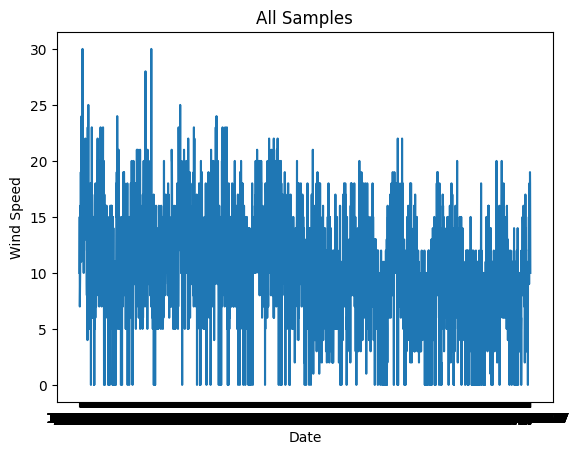

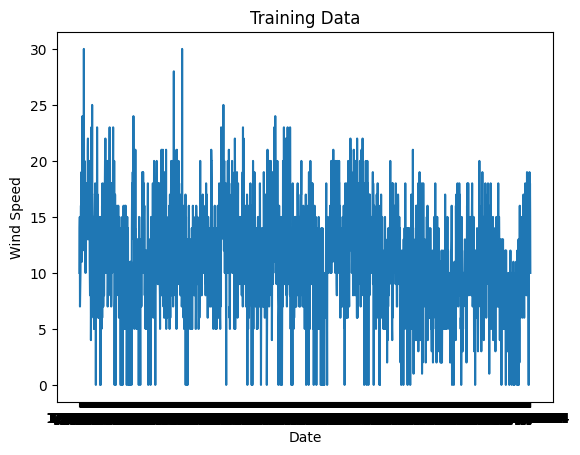

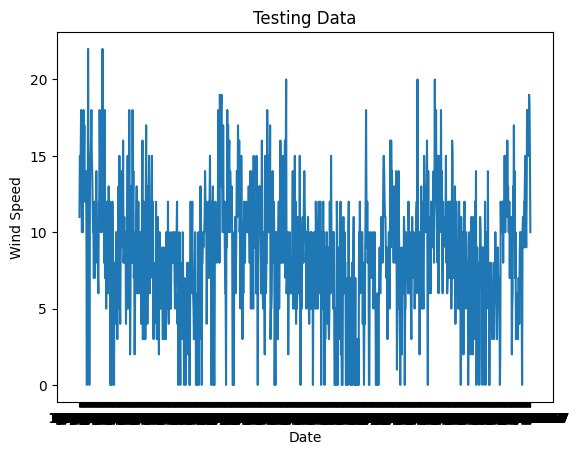

In [3]:
# Plotting the All Wind speed data
print("Plot Loading... ")
plt.plot(df["date"], df["wsp"])
plt.title("All Samples")
plt.xlabel("Date")
plt.ylabel("Wind Speed")
plt.show()

#Plot Training Data
train_date= df.loc[0:2556, 'date']
train_wsp= df.loc[0:2556,'wsp']
train_date= pd.DataFrame(train_date)
train_wsp= pd.DataFrame(train_wsp)
train_data  = train_date.join(train_wsp,how='outer')

plt.plot(train_data["date"], train_data["wsp"])
plt.title("Training Data")
plt.xlabel("Date")
plt.ylabel("Wind Speed")
plt.show()

#Plot Testing Data
test_date= df.loc[2557:3652, 'date']
test_wsp= df.loc[2557:3652,'wsp']
test_date= pd.DataFrame(test_date)
test_wsp= pd.DataFrame(test_wsp)
test_data  = test_date.join(test_wsp,how='outer')

plt.plot(test_data["date"], test_data["wsp"])
plt.title("Testing Data")
plt.xlabel("Date")
plt.ylabel("Wind Speed")
plt.show()

In [4]:
#Variables for training
cols = list(df)[1:2]
#Date and volume columns are not used in training. 
print(cols) #['wsp']

df_for_training = df[cols].astype(float)

raw = df['wsp'].tolist()


['wsp']


In [5]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X = list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x = sequence[i:end_ix]
		X.append(seq_x)

	return array(X)


In [7]:
# define input sequence

# choose a number of time steps
n_steps = 6
# split into samples
X= split_sequence(raw, n_steps)

In [8]:
#Pre-processed dataset
df = pd.DataFrame(X)
df_for_training = df.astype(float)
print(df_for_training.head())

      0     1     2     3     4     5
0  10.0  14.0  15.0   7.0   8.0   9.0
1  14.0  15.0   7.0   8.0   9.0  10.0
2  15.0   7.0   8.0   9.0  10.0  13.0
3   7.0   8.0   9.0  10.0  13.0  16.0
4   8.0   9.0  10.0  13.0  16.0  16.0


In [9]:
#Standardize the datasets
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [10]:
#Empty lists to be populated using formatted training data
X = []
Y = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 1  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In this example, df_for_training_scaled has a shape (3653, 1)
#3653 refers to the number of data points and 1 refers to the columns (single-variable).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    X.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    Y.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    
X, Y = np.array(X), np.array(Y)
print('X shape == {}.'.format(X.shape))
print('Y shape == {}.'.format(Y.shape))

X shape == (3646, 1, 6).
Y shape == (3646, 1).


In [11]:
#Splitting data to testing and training sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test= train_test_split(X, Y, test_size= 0.3, random_state= 10)


In [16]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 100)              22800     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 22,901
Trainable params: 22,901
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
48/48 [==============================] - 8s 53ms/step - loss: 0.8026 - val_loss: 0.6253
Epoch 2/20
48/48 [==============================] - 0s 6ms/step - loss: 0.4144 - val_loss: 0.3011
Epoch 3/20
48/48 [==============================] - 0s 5ms/step - loss: 0.1848 - val_loss: 0.0893
Epoch 4/20
48/48 [==============================] - 0s 5ms/step - loss: 0.0401 - val_loss: 0.0079
Epoch 5/20
48/48 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 6/20
48/48 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 7/20
48/48 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 8/20
48/48 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/20
48/48 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/20
48/48 [==============================] - 2s 41ms/step - loss: 9.8405e-04 - val_loss: 0.0011
Epoch 11/20
4

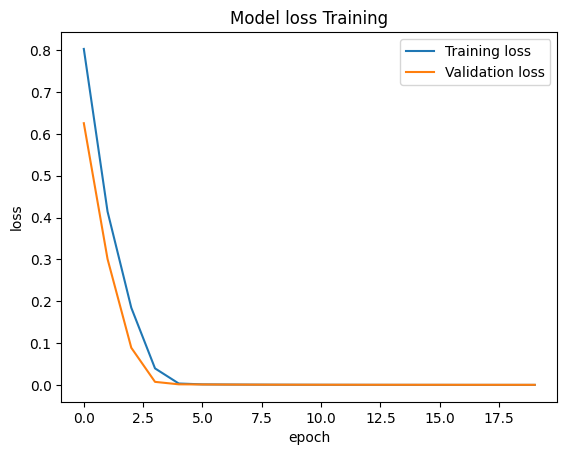

In [17]:
# fit the model
history = model.fit(X_train, y_train, epochs=20, batch_size=48, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Model loss Training")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [18]:
#Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=16)
print("test loss, test acc:", results)


Evaluate on test data
69/69 [==============================] - 4s 56ms/step - loss: 7.0999e-04
test loss, test acc: 0.0007099944050423801


In [19]:
#Make prediction
prediction = model.predict(X_test) 


35/35 [==============================] - 2s 40ms/step


In [20]:
#Unstandardize the y_pred and y_test
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred = scaler.inverse_transform(prediction_copies)[:,0].astype(float)
y_test_copies = np.repeat(y_test, df_for_training.shape[1], axis=-1)
y_true = scaler.inverse_transform(y_test_copies)[:,0]

In [21]:
#Performance Metrics
mse = sklearn.metrics.mean_squared_error(y_pred,y_true)
import math
rmse = math.sqrt(mse)
mae= sklearn.metrics.mean_absolute_error(y_pred,y_true)
r2= sklearn.metrics.r2_score(y_pred,y_true)#Coefficient of Determination (R2)
me= sklearn.metrics.max_error(y_true, y_pred) 
from sklearn.metrics import mean_absolute_percentage_error
mape= mean_absolute_percentage_error(y_pred, y_true)
r = np.corrcoef(y_pred, y_true)


In [22]:
#Print all Performance metrics
print(f'me= {me}')
print(f'mse= {mse}')
print(f'mae= {mae}')
print(f'rmse= {rmse}')
print(f'r2= {r2}')
print(f'mape= {mape}')


me= 1.725809097290039
mse= 0.015086209101054435
mae= 0.08667472428412362
rmse= 0.12282593008422299
r2= 0.9993124798234877
mape= 0.04501992360408466


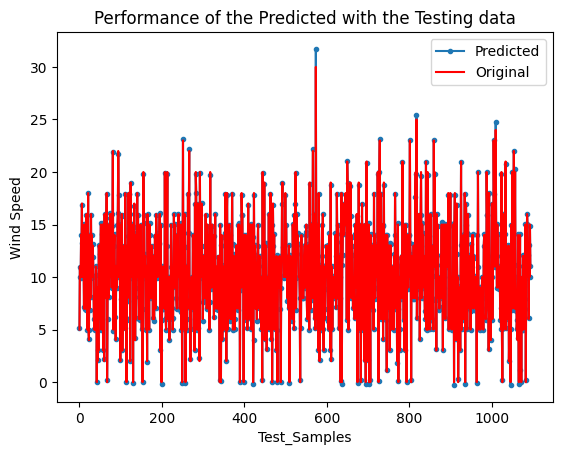

In [23]:
#Plotting the Predicted and Testing data
plt.title('Performance of the Predicted with the Testing data')
plt.plot(y_pred.flatten(),marker= '.', label='Predicted')
plt.plot(y_true.flatten(),'r', label='Original')
plt.xlabel("Test_Samples")
plt.ylabel("Wind Speed")
plt.legend()